In [1]:
import pandas as pd

df = pd.read_csv('landslides.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1693 non-null   int64  
 1   date            1690 non-null   object 
 2   time            629 non-null    object 
 3   country_name    1693 non-null   object 
 4   state/province  1692 non-null   object 
 5   population      1693 non-null   int64  
 6   landslide_type  1692 non-null   object 
 7   trigger         1691 non-null   object 
 8   fatalities      1446 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 119.2+ KB


In [2]:
df.date = pd.to_datetime(df.date, format='%m/%d/%y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1693 non-null   int64         
 1   date            1690 non-null   datetime64[ns]
 2   time            629 non-null    object        
 3   country_name    1693 non-null   object        
 4   state/province  1692 non-null   object        
 5   population      1693 non-null   int64         
 6   landslide_type  1692 non-null   object        
 7   trigger         1691 non-null   object        
 8   fatalities      1446 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 119.2+ KB


In [3]:
#df[~df.isnull().any(axis=1)]
df[df.isnull().any(axis=1)]

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,NaN
1,42,2007-03-22,NaN,United States,Ohio,17288,Landslide,Rain,NaN
2,56,2007-04-06,NaN,United States,Pennsylvania,15930,Landslide,Rain,NaN
3,59,2007-04-14,NaN,Canada,Quebec,42786,Riverbank collapse,Rain,NaN
4,61,2007-04-15,NaN,United States,Kentucky,6903,Landslide,Downpour,0.0
...,...,...,...,...,...,...,...,...,...
1682,7529,2016-02-27,NaN,United States,Idaho,939,Rockfall,Unknown,0.0
1684,7531,2016-02-14,NaN,United States,Colorado,16887,Rockfall,Freeze thaw,0.0
1687,7534,2015-11-29,NaN,United States,North Carolina,1646,Mudslide,Unknown,0.0
1688,7535,2015-12-07,NaN,United States,North Carolina,1646,Rockfall,NaN,0.0


In [4]:
# Total number of missing values
df.isnull().sum().sum()

1318

In [5]:
# identidy rows with null values in 'date' column
df[df.date.isnull()]

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
1482,7042,NaT,Morning,United States,Kansas,857,Mudslide,Downpour,0.0
1497,7080,NaT,13:00,United States,Ohio,4113,Landslide,Unknown,0.0
1526,7165,NaT,12:15,United States,Indiana,2085,Landslide,Rain,0.0


In [6]:
# Drop rows with missing values in the 'date' column
df = df.dropna(subset='date')

In [7]:
df.time.value_counts(dropna=False)

time
NaN              1064
Night              97
Morning            87
Afternoon          58
Early morning      36
                 ... 
1:13                1
9:40:00             1
11:50:00            1
                    1
21:06               1
Name: count, Length: 160, dtype: int64

In [8]:
# Fill missing values in the 'time' columns with your value of choice
df.time = df.time.fillna('Not known')

In [9]:
# Fill missing values in the 'fatalities' column with the mean value
df.fatalities = df.fatalities.fillna(df.fatalities.mean().round(2))

In [10]:
df

,id,date,time,country_name,state/province,population,landslide_type,trigger,fatalities
0,34,2007-03-02,Night,United States,Virginia,16000,Landslide,Rain,1.46
1,42,2007-03-22,Not known,United States,Ohio,17288,Landslide,Rain,1.46
2,56,2007-04-06,Not known,United States,Pennsylvania,15930,Landslide,Rain,1.46
3,59,2007-04-14,Not known,Canada,Quebec,42786,Riverbank collapse,Rain,1.46
4,61,2007-04-15,Not known,United States,Kentucky,6903,Landslide,Downpour,0.00
...,...,...,...,...,...,...,...,...,...
1688,7535,2015-12-07,Not known,United States,North Carolina,1646,Rockfall,NaN,0.00
1689,7537,2016-02-22,0:00,United States,West Virginia,51400,Mudslide,Unknown,0.00
1690,7539,2016-02-23,Not known,United States,West Virginia,2406,Landslide,Rain,0.00
1691,7540,2016-02-26,21:06,United States,West Virginia,1048,Rockfall,Unknown,0.00


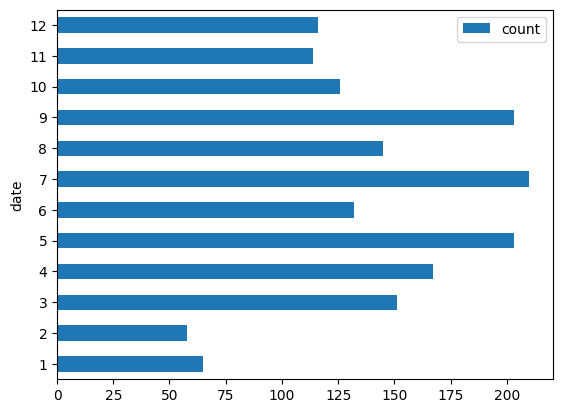

In [11]:
import seaborn as sns
freq = df.date.dt.month.value_counts().reset_index()
freq.nsmallest(12, 'date').plot(kind='barh', x='date');

In [12]:
vals = ['Not known', 'Afternoon', 'Evening', 'Morning', 'Night']

df = df[df.time.isin(vals)]

In [13]:
df.time.value_counts()

time
Not known    1064
Night          97
Morning        87
Afternoon      58
Evening        10
Name: count, dtype: int64